In [48]:
import pandas as pd
import matplotlib.pyplot as plt
path = '/content/drive/MyDrive/Collabz/client_feedback.csv'
df = pd.read_csv(path)  # or use generated fake data

df.head()



,Service received from counsellor,Facilities,Support Programs
0,My counsellor helped me make sense of my emoti...,"It did the job, no complaints.",I stayed mostly quiet and just listened.
1,Every session brought me one step closer to re...,The entrance was confusing and not welcoming.,"I didn’t dislike it, but it wasn’t very impact..."
2,"There wasn’t much depth, but it was okay.",Great balance of privacy and openness.,The activities were creative and helped me ref...
3,My counsellor helped me make sense of my emoti...,The garden outside helped me decompress.,It felt like they were going through the motions.
4,I didn’t feel any connection with my counsellor.,Comfortable seating and well-lit rooms.,The support programs exceeded my expectations.


# The sentiment Model

In [10]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")



def stars_to_score(text):
    try:
        result = sentiment_pipeline(text[:512])[0]
        stars = int(result['label'].split()[0])  # 1 to 5
        return round(((stars - 1) / 4) * 9 + 1, 1)  # maps 1–5 stars to 1.0–10.0
    except:
        return None



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


In [11]:
df['counsellor_rating'] = df['Service received from counsellor'].apply(stars_to_score)
df['facilities_rating'] = df['Facilities'].apply(stars_to_score)
df['programs_rating'] = df['Support Programs'].apply(stars_to_score)

# overall sentiment score (1–10)
df['overall_rating'] = df[['counsellor_rating', 'facilities_rating', 'programs_rating']].mean(axis=1)


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [14]:
def classify(score):

    if 0 < score <=2:
        return 'Dissatisfied'
    elif 2 < score <5:
        return 'Moderately Dissatisfied'
    elif score ==5:
        return 'Neutral'
    elif  5 < score <= 7:
        return 'Moderately Satisfied'
    elif  7 < score:
        return 'Satisfied'



df['overall_sentiment'] = df['overall_rating'].apply(classify)


In [15]:
df [df.columns[3:]]

,counsellor_rating,facilities_rating,programs_rating,overall_rating,overall_sentiment
0,10.0,7.8,5.5,7.766667,Satisfied
1,10.0,3.2,5.5,6.233333,Moderately Satisfied
2,5.5,10.0,10.0,8.500000,Satisfied
3,3.2,3.2,7.8,4.733333,Moderately Dissatisfied
4,10.0,10.0,3.2,7.733333,Satisfied
...,...,...,...,...,...
71,5.5,5.5,10.0,7.000000,Moderately Satisfied
72,10.0,3.2,5.5,6.233333,Moderately Satisfied
73,5.5,3.2,5.5,4.733333,Moderately Dissatisfied
74,5.5,10.0,10.0,8.500000,Satisfied


In [16]:
df[['counsellor_rating', 'facilities_rating', 'programs_rating', 'overall_rating']].mean()


,0
counsellor_rating,5.728947
facilities_rating,5.751316
programs_rating,7.067105
overall_rating,6.182456


<Axes: >

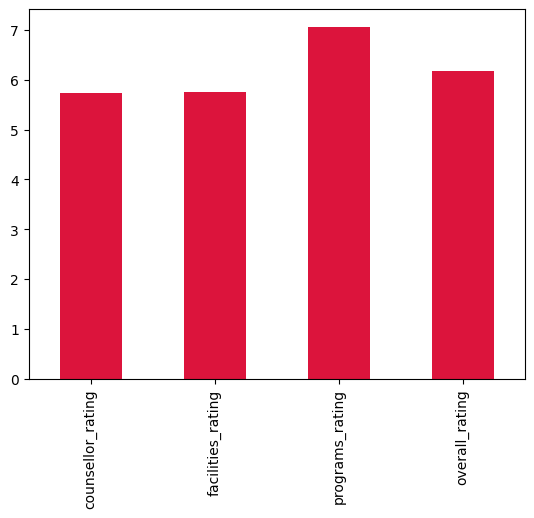

In [17]:
df[['counsellor_rating', 'facilities_rating', 'programs_rating', 'overall_rating']].mean().plot(kind='bar',color='crimson')


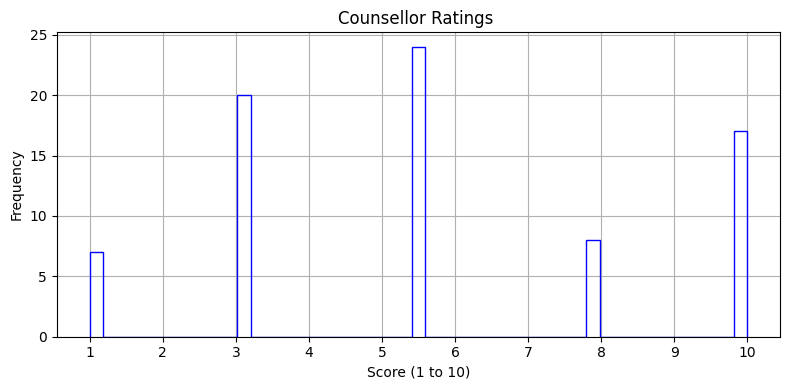

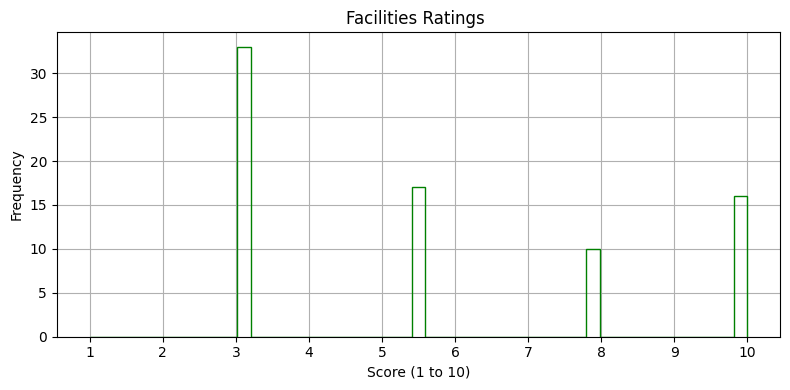

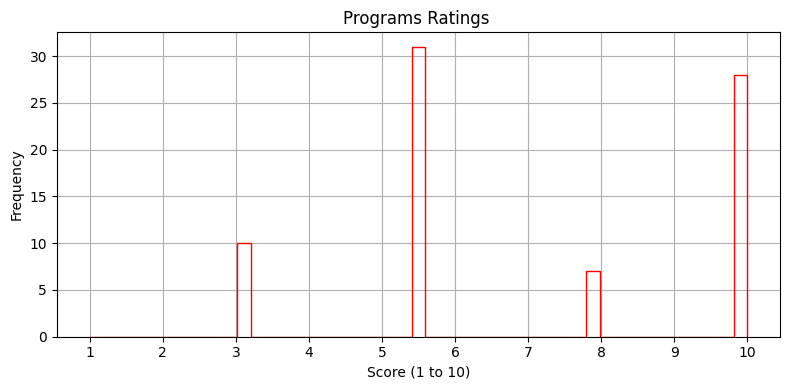

In [42]:

rating_columns = [
    ('counsellor_rating', 'Counsellor Ratings ', 'blue'),
    ('facilities_rating', 'Facilities Ratings ', 'green'),
    ('programs_rating', 'Programs Ratings ', 'red')
]

bins = np.linspace(1, 10, 50)
xticks = np.arange(1, 11, 1)

for col, title, color in rating_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=bins, histtype='step', color=color)
    plt.title(title)
    plt.xlabel('Score (1 to 10)')
    plt.ylabel('Frequency')
    plt.xticks(xticks)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


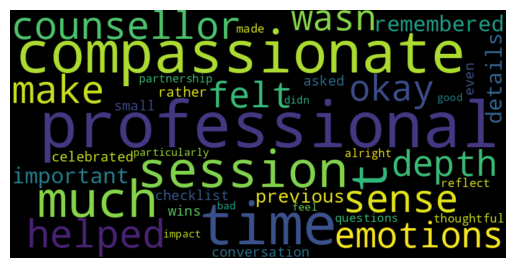

In [19]:
from wordcloud import WordCloud


neg_text = ' '.join(df[df['overall_sentiment'] == 'Satisfied']['Service received from counsellor'].tolist())
wordcloud = WordCloud(width=800, height=400).generate(neg_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [22]:
from keybert import KeyBERT

kw_model = KeyBERT(model='all-MiniLM-L6-v2')



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [27]:

from collections import Counter



def extract_keyphrases_below_threshold(df, text_column, score_column, threshold=3.0, top_n=10):

    filtered_texts = df[df[score_column] < threshold][text_column].dropna().tolist()

    all_phrases = []
    for text in filtered_texts:
        try:
            phrases = kw_model.extract_keywords(
                text,
                keyphrase_ngram_range=(1, 3),
                stop_words='english'
            )
            all_phrases.extend([phrase for phrase, score in phrases])
        except:
            continue

    return Counter(all_phrases).most_common(top_n)


In [41]:
# For counsellor feedback
print("Top keyphrases from low-rated counsellor feedback:")
print(extract_keyphrases_below_threshold(df, 'Service received from counsellor', 'counsellor_rating'))




Top keyphrases from low-rated counsellor feedback:
[('dismissed concerns discussion', 4), ('dismissed concerns', 4), ('concerns discussion', 4), ('dismissed', 4), ('discussion', 4), ('counsellor didn', 3), ('counsellor didn make', 3), ('counsellor', 3), ('eye contact engage', 3), ('didn make eye', 3)]
